In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [71]:
# Read the files from the source files
train=pd.read_csv("C:\\Data Science\\Projects\\Kaggle-All state claims severity\\train.csv")
test=pd.read_csv("C:\\Data Science\\Projects\\Kaggle-All state claims severity\\test.csv")

In [72]:
#print a few observations from train
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [73]:
#print a few obsrvations of test dataset
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [74]:
# Take a copy of original train and test datasets
train_original=train.copy()
test_original=test.copy()

In [75]:
print(set(test.columns).issubset(set(train.columns)))
print(set(train.columns).difference(test.columns))
print(train.shape)
print(test.shape)

True
{'loss'}
(188318, 132)
(125546, 131)


In [76]:
train.loss.skew()

3.7949583775378604

In [77]:
# assign the loss column from train dataset to y
y=np.log1p(train.loss)   # we determined that it is skwed



In [78]:
y.head()

0    7.702637
1    7.158203
2    8.008396
3    6.846784
4    7.924742
Name: loss, dtype: float64

In [79]:
#strip loss column from train dataset as it is already assigned to y
train.drop(columns=["loss"],inplace=True)

In [80]:
# strip id column from both train and test
# before that, assign id column of test dataset to ID column so it is used for submission later
ID=test.id
train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)

In [81]:
train_objs_num = len(train)
dataset = pd.concat(objs=[train, test], axis=0)
dataset = pd.get_dummies(dataset)

In [82]:
dataset.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,...,0,0,0,0,0,0,0,0,0,0
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,...,0,0,0,0,0,0,0,0,0,0
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,...,0,0,0,0,0,0,0,0,0,0
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,...,0,0,0,0,0,0,0,0,0,0
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,...,0,0,0,0,0,0,0,0,0,0


In [83]:
print(dataset.iloc[:train_objs_num,].shape)
print(dataset.iloc[train_objs_num:,:].shape)

(188318, 1190)
(125546, 1190)


In [84]:
train=dataset.iloc[:train_objs_num,]
test=dataset.iloc[train_objs_num:,:]

In [85]:
pd.set_option("display.max_info_rows",None)

#train.info(verbose=True,null_counts=True)  #output shows no null or missing values

In [86]:
import warnings
warnings.filterwarnings("ignore")


In [87]:
# size and shape of dataframe
print(train.shape)
print("\n",test.shape)
train.info()

(188318, 1190)

 (125546, 1190)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 0 to 188317
Columns: 1190 entries, cont1 to cat116_Y
dtypes: float64(14), uint8(1176)
memory usage: 232.8 MB


In [88]:
# skewness of the distribution. Consider only float variables(features)
train.select_dtypes(include=['float64']).skew()   # Results show not much skewness in continuous variables

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
dtype: float64

In [89]:
# let us visualize all continuous attributes using violin plot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [90]:
# get subframe of continuous columns
float_train=train.select_dtypes(include=['float64'])
float_train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [91]:
n_cols=2
n_rows=8


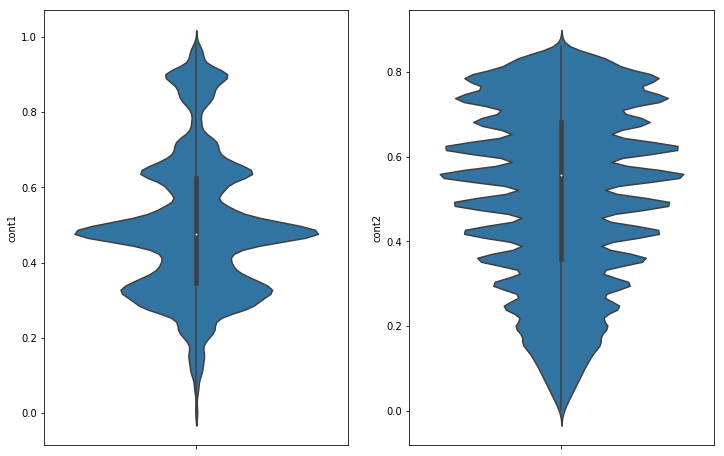

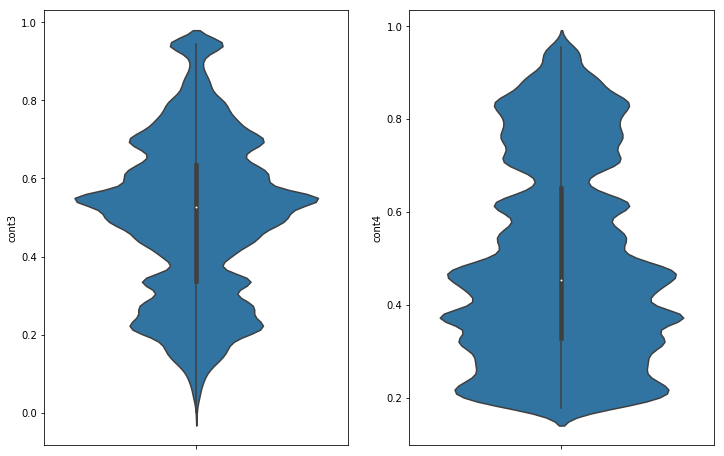

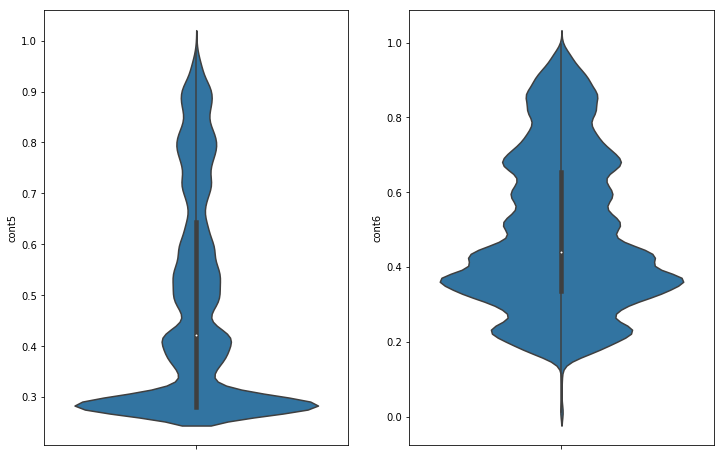

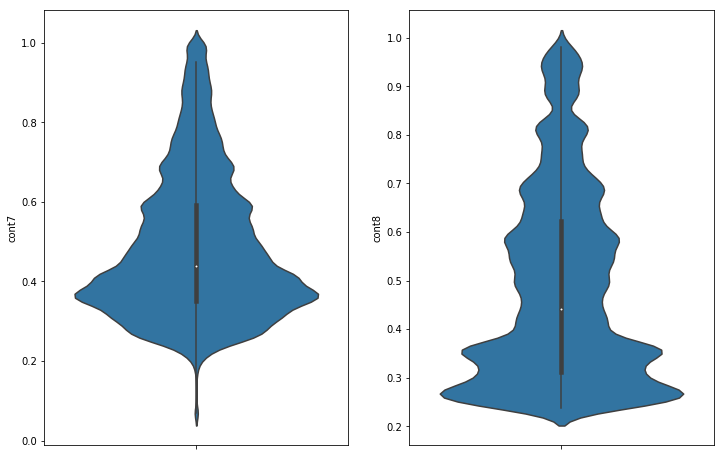

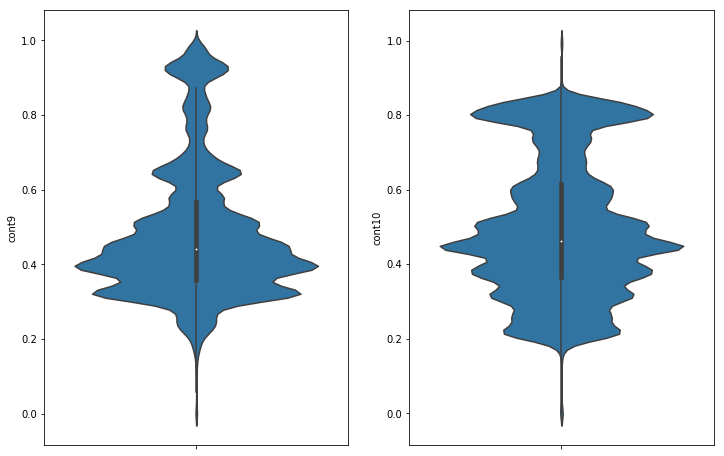

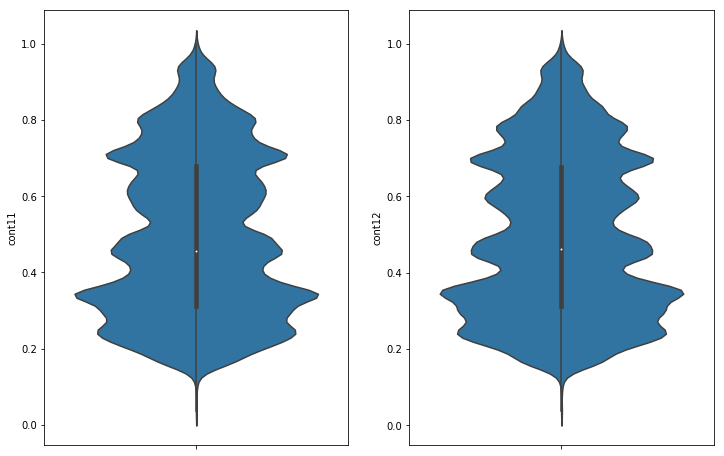

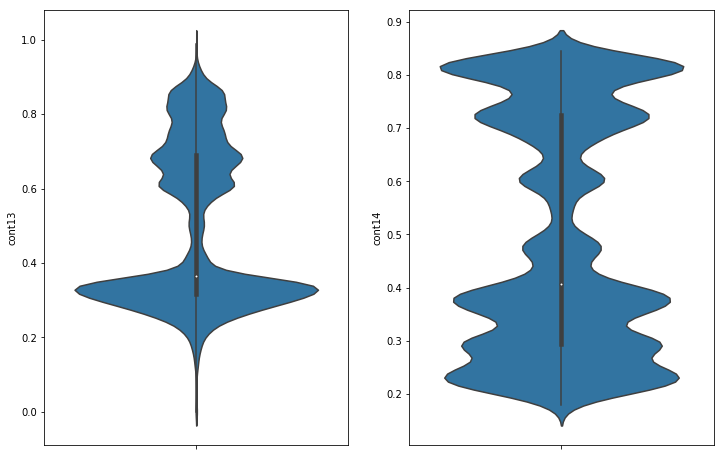

In [92]:
#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

cols=float_train.columns
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=float_train, ax=ax[j])

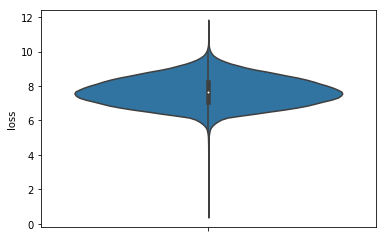

In [93]:
#let is fix the skewness of "loss"
import numpy as np
sns.violinplot(data=pd.DataFrame(y),y="loss")  
plt.show()   # result show after log transformation, loss is NO more skwed.

In [94]:
float_train.corr()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638
cont6,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178
cont7,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286
cont8,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539
cont9,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154
cont10,0.808551,0.063526,-0.325562,0.283294,-0.064967,0.883351,0.492621,0.336588,0.785697,1.000000,0.702896,0.713812,0.707876,0.041808


           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1   1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315  0.367384   
cont2  -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864  0.048187   
cont3  -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278  0.097516   
cont4   0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932 -0.115064   
cont5  -0.025230  0.191427  0.089417  0.163748  1.000000 -0.149810 -0.249344   
cont6   0.758315  0.015864 -0.349278  0.220932 -0.149810  1.000000  0.658918   
cont7   0.367384  0.048187  0.097516 -0.115064 -0.249344  0.658918  1.000000   
cont8   0.361163  0.137468 -0.185432  0.528740  0.009015  0.437437  0.142042   
cont9   0.929912 -0.032729 -0.417054  0.328961 -0.088202  0.797544  0.384343   
cont10  0.808551  0.063526 -0.325562  0.283294 -0.064967  0.883351  0.492621   
cont11  0.596090  0.116824  0.025271  0.120927 -0.151548  0.773745  0.747108   
cont12  0.614225  0.106250  0.006111  0.

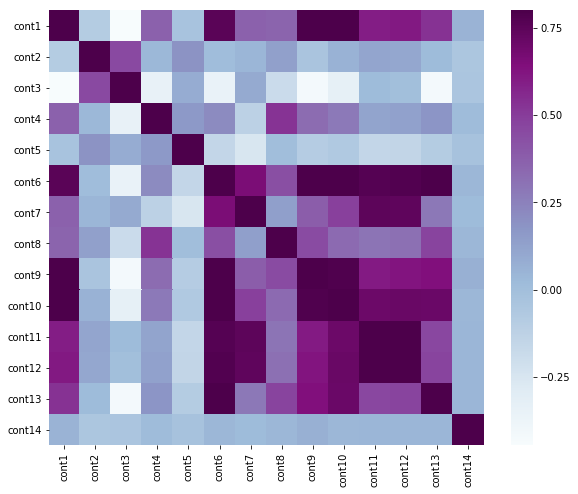

In [95]:
matrix=float_train.corr()
print(matrix)
plt.figure(figsize=(10,8))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [96]:
# Determine the pairs with high correlations ( > 0.5)

corr_list=[]
for col1 in matrix.index:
    for col2 in matrix.columns:  
        correlation=round(matrix.loc[col2,col1],4)
        if (np.abs(correlation) > 0.5) & (np.abs(correlation) < 1.0):
            trio=[col1,col2,correlation]
            colpair_list=trio
            reversed_colpair_list=[colpair_list[1],colpair_list[0],colpair_list[2]]
            if reversed_colpair_list in corr_list:
                pass
            else:
                corr_list.append(colpair_list)

In [97]:
corr_list.sort(key=lambda l:l[2],reverse=True) # sort the pairs in descending order of correlation

In [98]:
corr_list

[['cont11', 'cont12', 0.9944],
 ['cont1', 'cont9', 0.9299],
 ['cont6', 'cont10', 0.8834],
 ['cont6', 'cont13', 0.8151],
 ['cont1', 'cont10', 0.8086],
 ['cont6', 'cont9', 0.7975],
 ['cont9', 'cont10', 0.7857],
 ['cont6', 'cont12', 0.7851],
 ['cont6', 'cont11', 0.7737],
 ['cont1', 'cont6', 0.7583],
 ['cont7', 'cont11', 0.7471],
 ['cont7', 'cont12', 0.7427],
 ['cont10', 'cont12', 0.7138],
 ['cont10', 'cont13', 0.7079],
 ['cont10', 'cont11', 0.7029],
 ['cont6', 'cont7', 0.6589],
 ['cont9', 'cont13', 0.642],
 ['cont9', 'cont12', 0.6267],
 ['cont1', 'cont12', 0.6142],
 ['cont9', 'cont11', 0.608],
 ['cont1', 'cont11', 0.5961],
 ['cont1', 'cont13', 0.5348],
 ['cont4', 'cont8', 0.5287]]

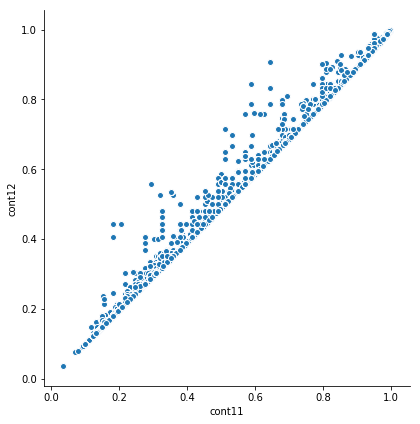

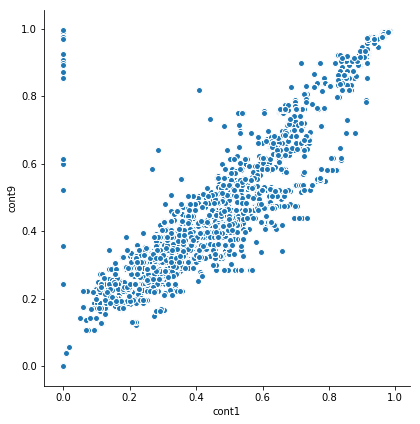

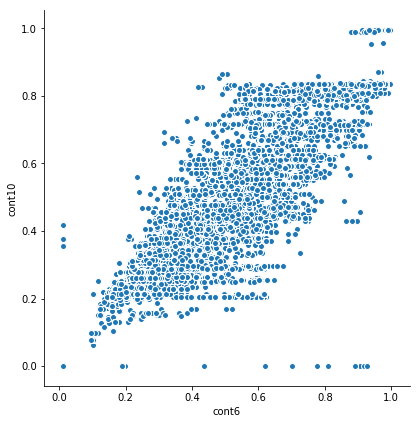

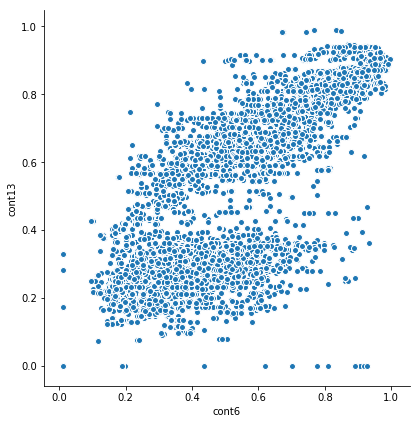

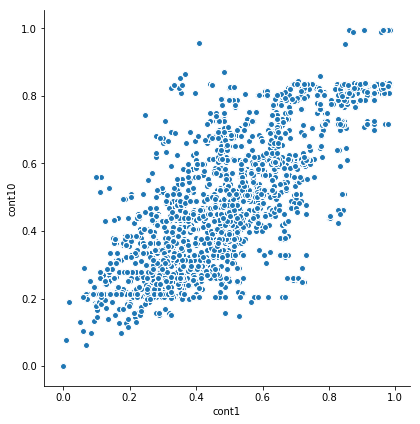

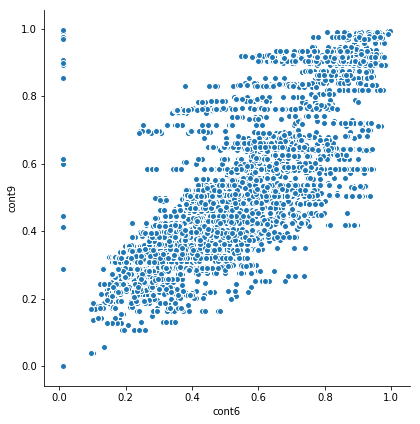

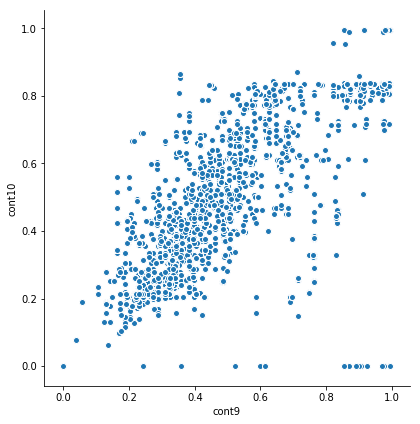

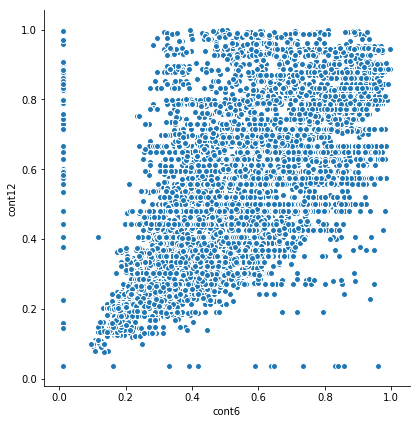

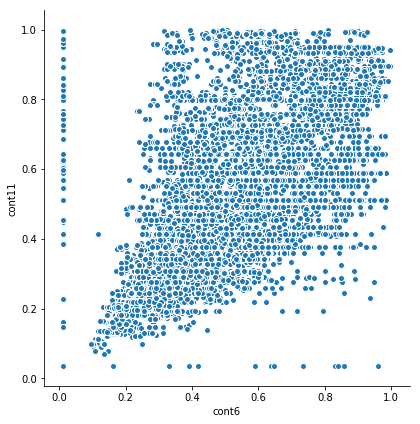

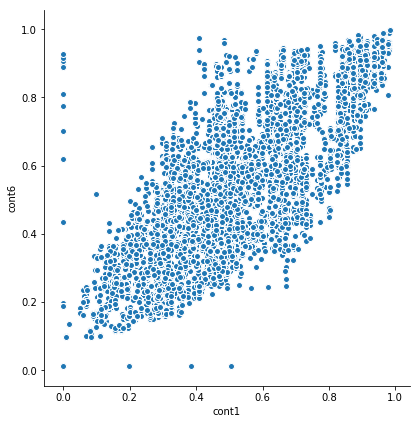

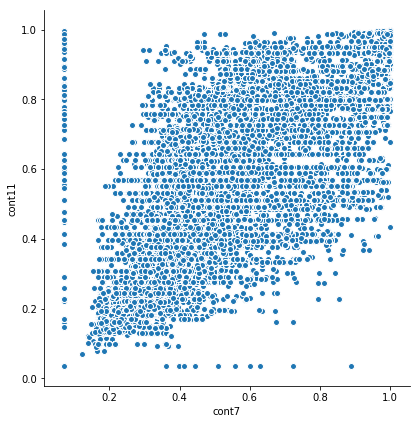

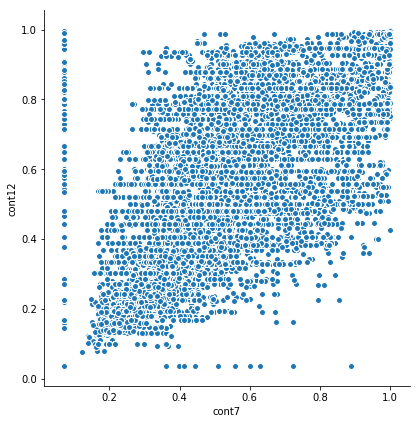

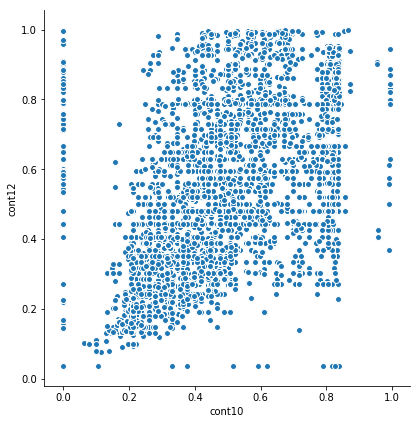

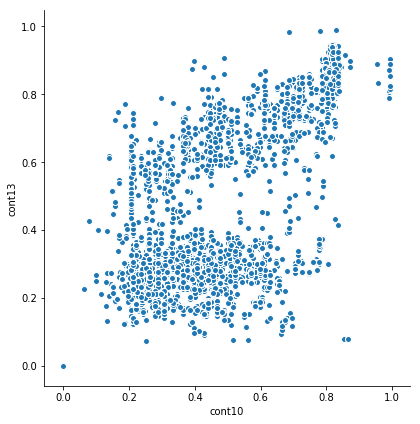

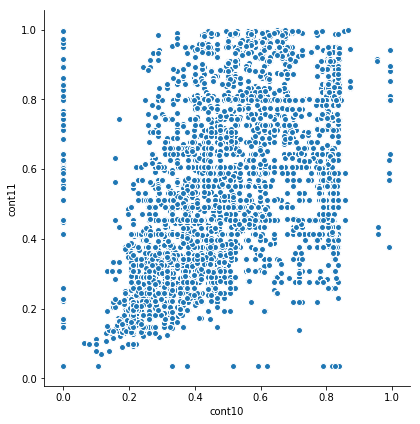

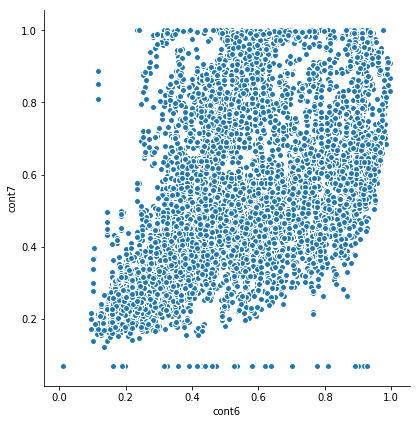

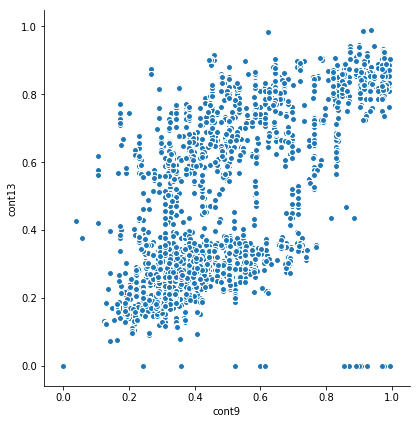

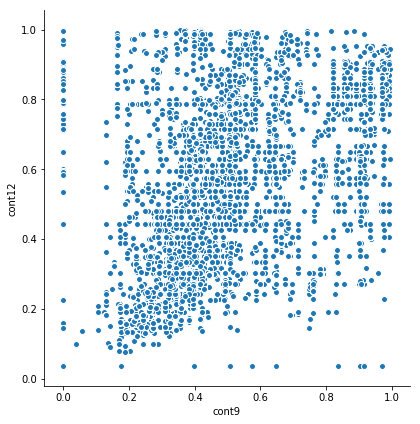

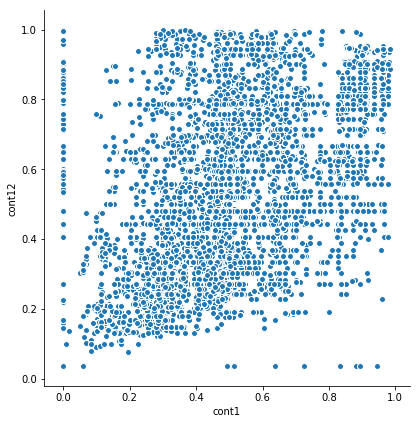

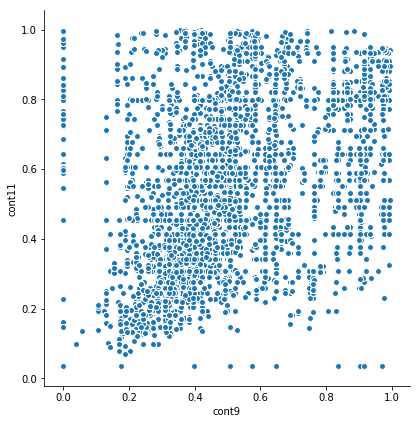

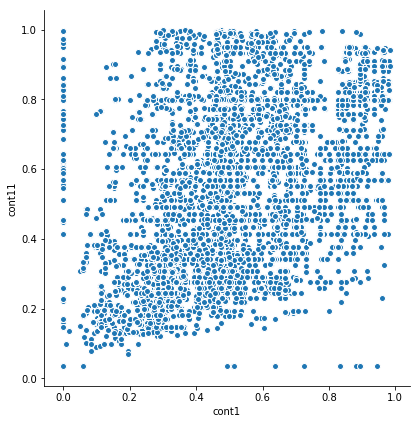

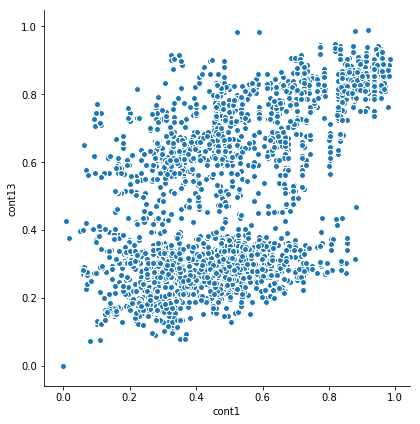

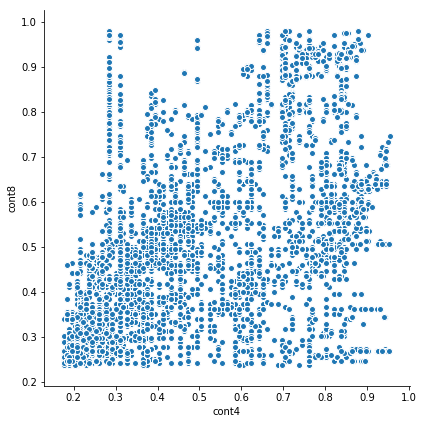

In [99]:
# Let us also do a scatterplot of correlated pairs
for c1,c2,val in corr_list:
    sns.pairplot(float_train, size=6, x_vars=c1,y_vars=c2)
    plt.show()


In [100]:
# let us get rid of 3 highly correlated variables
# ['cont11', 'cont12', 0.9944]
# ['cont1', 'cont9', 0.9299]
# ['cont6', 'cont10', 0.8834]

# point here is: which one we need to get rid of from each pair. to determine this, retain the one with highest 
# correlation with the target variable
#drop cont12
#drop cont1
#drop cont10

drop_cols=["cont1","cont10","cont12"]
train.drop(columns=drop_cols,inplace=True)
train.head()


,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont11,cont13,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.569745,0.822493,...,0,0,0,0,0,0,0,0,0,0
1,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.338312,0.611431,...,0,0,0,0,0,0,0,0,0,0
2,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.381398,0.195709,...,0,0,0,0,0,0,0,0,0,0
3,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.327915,0.605077,...,0,0,0,0,0,0,0,0,0,0
4,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.204687,0.246011,...,0,0,0,0,0,0,0,0,0,0


In [101]:
test.drop(columns=drop_cols,inplace=True)
test.head()

,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont11,cont13,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.377724,0.704052,...,0,0,0,0,0,0,0,0,0,0
1,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.689039,0.453468,...,0,0,0,0,0,0,0,0,0,0
2,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.245410,0.258586,...,0,0,0,0,0,0,0,0,0,0
3,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.348867,0.592264,...,0,0,0,0,0,0,0,0,0,0
4,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.359572,0.301535,...,0,0,0,0,0,0,0,0,0,0


### Summary of what we did so far:
1. Removed highly correlated independent variables
2. Did a log transformation(log1p) of the loss feature
3. Removed id column and converted categorical into dummy variables

In [102]:
X=train

In [103]:
print(X.shape)
print(y.shape)

(188318, 1187)
(188318,)


In [104]:
####################################################################################################
#####Let us split train data into X_train,X_val,y_train,y_val 

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=0)

In [105]:
y_train.shape

(131822,)

In [106]:
#Let us define a function which takes model as the paramter and determine the results for that model
results={}  # dictionary to store the model(regression model used) and their corresponding MAE,RSQUARE
def model_evaluation(algorithm,X_tr,y_tr,X_te,y_te):
    
    #determine the regression model based on "algorithm" parameter passed 
    if algorithm=="LINREG":
        model=LinearRegression()
    elif algorithm=="RANFOR":
        model=RandomForestRegressor()
    elif algorithm=="DECTREE":
        model=DecisionTreeRegressor()
    else:
        model="XGBRegressor"
    
    # fit the model
    model.fit(X_tr,y_tr)
    y_pred=model.predict(X_te)
    mae=mean_absolute_error(y_te,y_pred)
    rsquare=r2_score(y_te,y_pred)
    results[algorithm]=[mae,rsquare]

    #print the name of regression model that we are using
    print(algorithm)
    #Print the coefficients
    if algorithm not in(["DECTREE","RANFOR"]):
        print("Coefficients:\n",model.coef_)

    #print the mean absolute error
    print("Mean absolute error: ",mae)
    
    # print the variance square: 1 is a perfect prediction
    print("Variance score: ",rsquare)
    
    #add the model and the mae/rsquare to the "results" dictionary
    results[algorithm]=[model,mae,rsquare]   
    
    #print the results
    print("Results dictionary: ",results)
    
    return model
    

In [107]:
###import all regression model libraries at once
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score


In [108]:
model_evaluation("LINREG",X_train.values,y_train.values,X_val.values,y_val.values)

LINREG
Coefficients:
 [ 2.61795852e-01  2.45917531e-01  3.23146196e-02 ... -1.30408716e+10
 -4.10016990e+10 -4.32442555e+10]
Mean absolute error:  8265520.531992731
Variance score:  -5.936190578447712e+17
Results dictionary:  {'LINREG': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), 8265520.531992731, -5.936190578447712e+17]}


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
results

{'LINREG': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  8265520.531992731,
  -5.936190578447712e+17]}

In [110]:
forest=model_evaluation("RANFOR",X_train,y_train,X_val,y_val)

RANFOR
Mean absolute error:  0.45739835536426166
Variance score:  0.46712019804536453
Results dictionary:  {'LINREG': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), 8265520.531992731, -5.936190578447712e+17], 'RANFOR': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 0.45739835536426166, 0.46712019804536453]}


In [111]:
model_evaluation("DECTREE",X_train,y_train,X_val,y_val)

DECTREE
Mean absolute error:  0.6180922369322037
Variance score:  0.026119793262236346
Results dictionary:  {'LINREG': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), 8265520.531992731, -5.936190578447712e+17], 'RANFOR': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 0.45739835536426166, 0.46712019804536453], 'DECTREE': [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='be

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [112]:
test.head()

,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont11,cont13,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.377724,0.704052,...,0,0,0,0,0,0,0,0,0,0
1,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.689039,0.453468,...,0,0,0,0,0,0,0,0,0,0
2,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.245410,0.258586,...,0,0,0,0,0,0,0,0,0,0
3,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.348867,0.592264,...,0,0,0,0,0,0,0,0,0,0
4,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.359572,0.301535,...,0,0,0,0,0,0,0,0,0,0


In [113]:
test.shape

(125546, 1187)

In [114]:
X.shape

(188318, 1187)

In [115]:
test_pred=np.expm1(forest.predict(test))

In [116]:
test_pred

array([2032.21871781, 2120.040357  , 9998.56988948, ..., 2415.43747902,
       1557.51712654, 3862.46661692])

In [117]:
allstate_submission_df_rf=pd.DataFrame()
allstate_submission_df_rf["id"]=ID
allstate_submission_df_rf["loss"]=test_pred

In [118]:
allstate_submission_df_rf

,id,loss
0,4,2032.218718
1,6,2120.040357
2,9,9998.569889
3,12,6854.210499
4,15,691.167833
5,17,2054.930610
6,21,3035.793094
7,28,1278.911684
8,32,2719.652806
9,43,3577.505300


In [119]:
allstate_submission_df_rf.to_csv("C:\\Data Science\\Projects\\Kaggle-All state claims severity\\submission.csv",index=False)